<a href="https://colab.research.google.com/github/vishal786-commits/machine-learning-journey/blob/main/projects/jamboree-admission-prediction/Jamboree_Graduate_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Vishal Gopalkrishna**

# **Jamboree Linear Regression Model**



---

## **Introduction**

Jamboree is a leading educational consultancy that supports students—particularly Indian applicants—in securing admissions to top international universities, including Ivy League institutions. As competition intensifies, students require objective, data-driven insights to understand their competitiveness and improve their profiles strategically.

To address this need, Jamboree aims to develop a predictive system that estimates an applicant’s likelihood of admission based on quantifiable academic and profile-related factors.

From a data science standpoint, this challenge can be framed as a supervised regression problem, where the target variable, Chance of Admit (ranging from 0 to 1), represents the probability of admission. The predictors include standardized test scores (GRE, TOEFL), academic performance (CGPA), university rating, research experience, and qualitative components such as SOP and LOR strength.


---

## **Problem Statement**

The objective of this study is to analyze the key factors influencing graduate admissions and develop an interpretable linear regression model to predict an applicant’s probability of admission. The model aims to provide actionable insights for students while enabling Jamboree to deliver data-driven, personalized guidance and strategic decision support.



In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [ ]:
# download Dataset

!gdown 1zO1ttneqKZbIBf9N5dcJ5XWYWWFcA5HV

Downloading...
From: https://drive.google.com/uc?id=1zO1ttneqKZbIBf9N5dcJ5XWYWWFcA5HV
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 27.1MB/s]


In [ ]:
df = pd.read_csv("Jamboree.csv")

# Display first few rows
df.head()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Serial No. is only an identifier and has no predictive value, so we drop it.
# Drop irrelevant column
df.drop(columns=["Serial No."], inplace=True)

# Verify
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Shape of the dataset
df.shape


(500, 8)

In [ ]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# Minimum and maximum values for each column
df.agg(['min', 'max'])


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
min,290,92,1,1.0,1.0,6.80,0,0.34
max,340,120,5,5.0,5.0,9.92,1,0.97


In [ ]:
# Statistical summary
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### **Initial EDA Inference**
* The dataset contains 500 applicants and 8 relevant numerical features, with no missing values, indicating high data quality.

* All variables fall within realistic and expected ranges, confirming data consistency and validity.

* The target variable Chance of Admit ranges from 0.34 to 0.97, representing admission probability.

* The average applicant has a GRE score of ~316, TOEFL score of ~107, and CGPA of ~8.58, indicating a generally strong and competitive applicant pool.

* Approximately 56% of applicants have prior research experience, making it a significant but non-universal differentiator.

* Most features show moderate variability, enabling meaningful differentiation between applicants.

* CGPA shows relatively low variance, suggesting that non-academic factors (SOP, LOR, Research) may play an important role in influencing admission chances.

* The clean, numerical nature of the dataset makes it well-suited for linear regression modeling and interpretation.

In [ ]:
# Mean, median, skewness for numerical variables
df.describe().T


,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
# Skewness of continuous variables
df.skew()


,0
GRE Score,-0.039842
TOEFL Score,0.095601
University Rating,0.090295
SOP,-0.228972
LOR,-0.145290
CGPA,-0.026613
Research,-0.242475
Chance of Admit,-0.289966


In [ ]:
# Research (categorical) value counts
df["Research"].value_counts(normalize=True)


,proportion
Research,
1,0.56
0,0.44


### Inference from Non-Graphical & Univariate Analysis

* The dataset represents a competitive applicant pool, with an average GRE score of ~316, TOEFL score of ~107, and CGPA of ~8.58.

* Most applicants fall within a narrow CGPA range (std ≈ 0.60), indicating that academic performance alone may not be sufficient to strongly differentiate candidates.

* SOP and LOR scores are centered around 3.5, showing moderate to strong qualitative profiles across applicants.

* 56% of applicants have research experience, suggesting research is a common but still meaningful factor.

* The average Chance of Admit is ~0.72, with values ranging from 0.34 to 0.97, indicating substantial variability in admission probability.

* Skewness values for most features are close to zero, implying approximately symmetric distributions and no severe skewness.

* SOP, LOR, and Research show slightly higher skewness, reflecting subjective evaluation differences among applicants.

* The absence of extreme skewness or anomalies supports the suitability of linear regression for modeling this data.

## Univariate Analysis (Graphical)

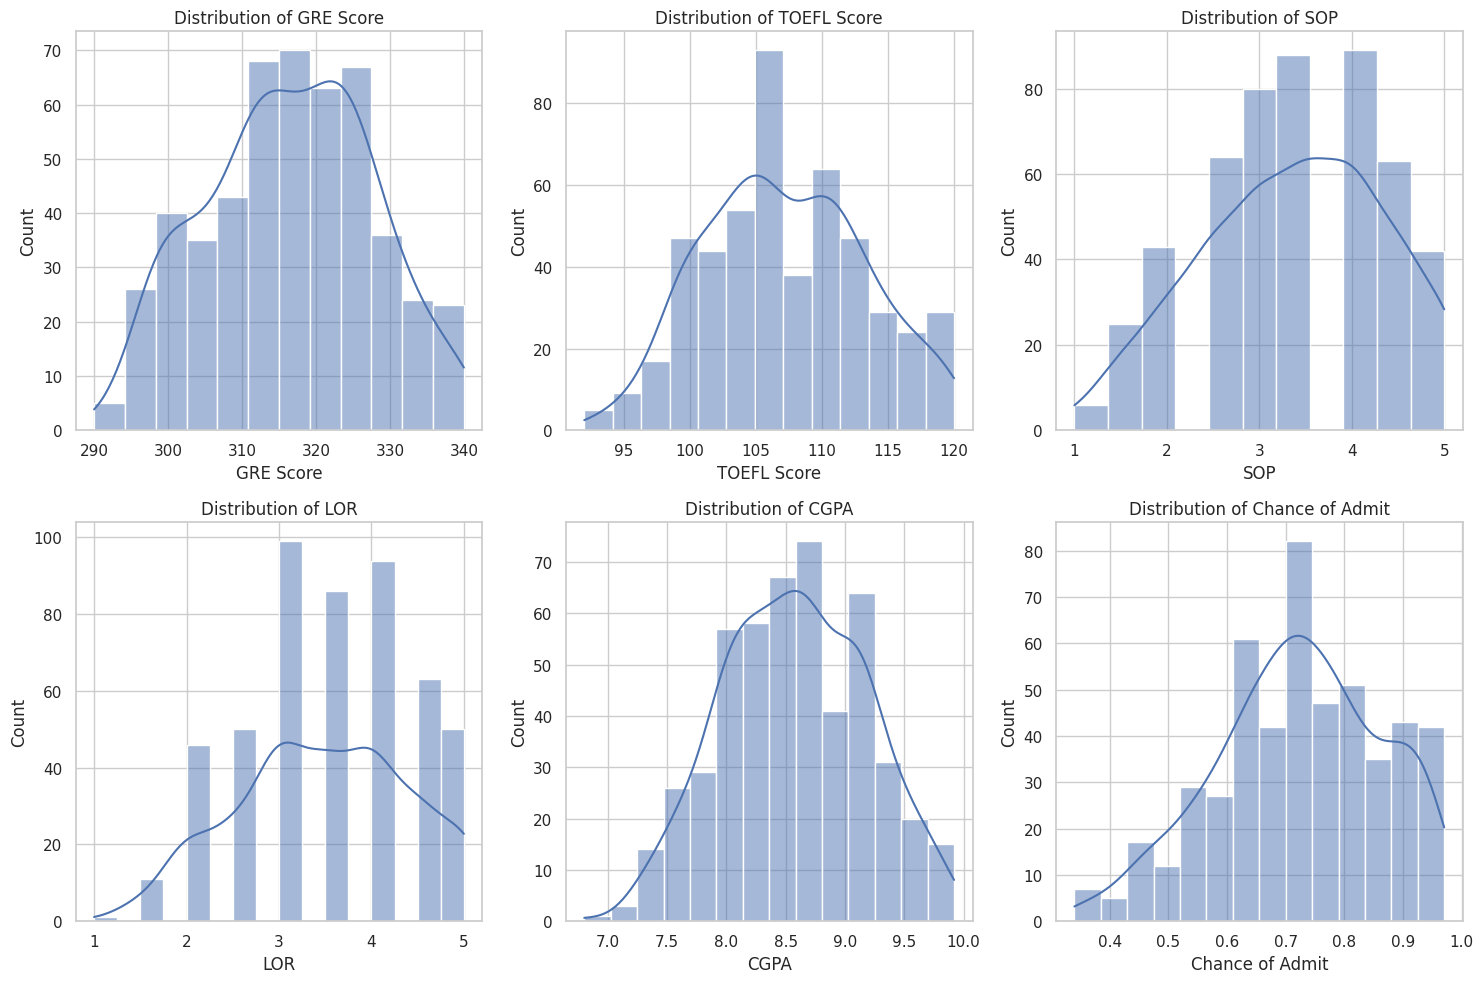

In [ ]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify
df.columns

# List of continuous variables
continuous_vars = ["GRE Score", "TOEFL Score", "SOP", "LOR", "CGPA", "Chance of Admit"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


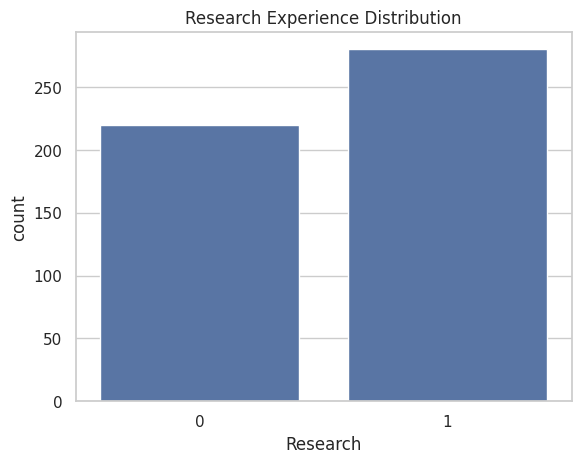

In [ ]:
# Count plot for Research
sns.countplot(x="Research", data=df)
plt.title("Research Experience Distribution")
plt.show()


### Univariate Analysis (Distributions)

* GRE and TOEFL scores follow an approximately normal distribution, centered around higher score ranges, indicating a generally strong applicant pool.

* CGPA is slightly right-skewed and concentrated between 8.0 and 9.5, showing limited academic variability among applicants.

* SOP and LOR scores are clustered around 3 to 4, reflecting moderate-to-strong qualitative profiles with some subjectivity.

* Chance of Admit is unimodal and centered around 0.7–0.8, suggesting most applicants have a reasonably good probability of admission.

* Research experience is fairly balanced, with a slight majority of applicants having research exposure.

# Bivariate Analysis (Graphical)

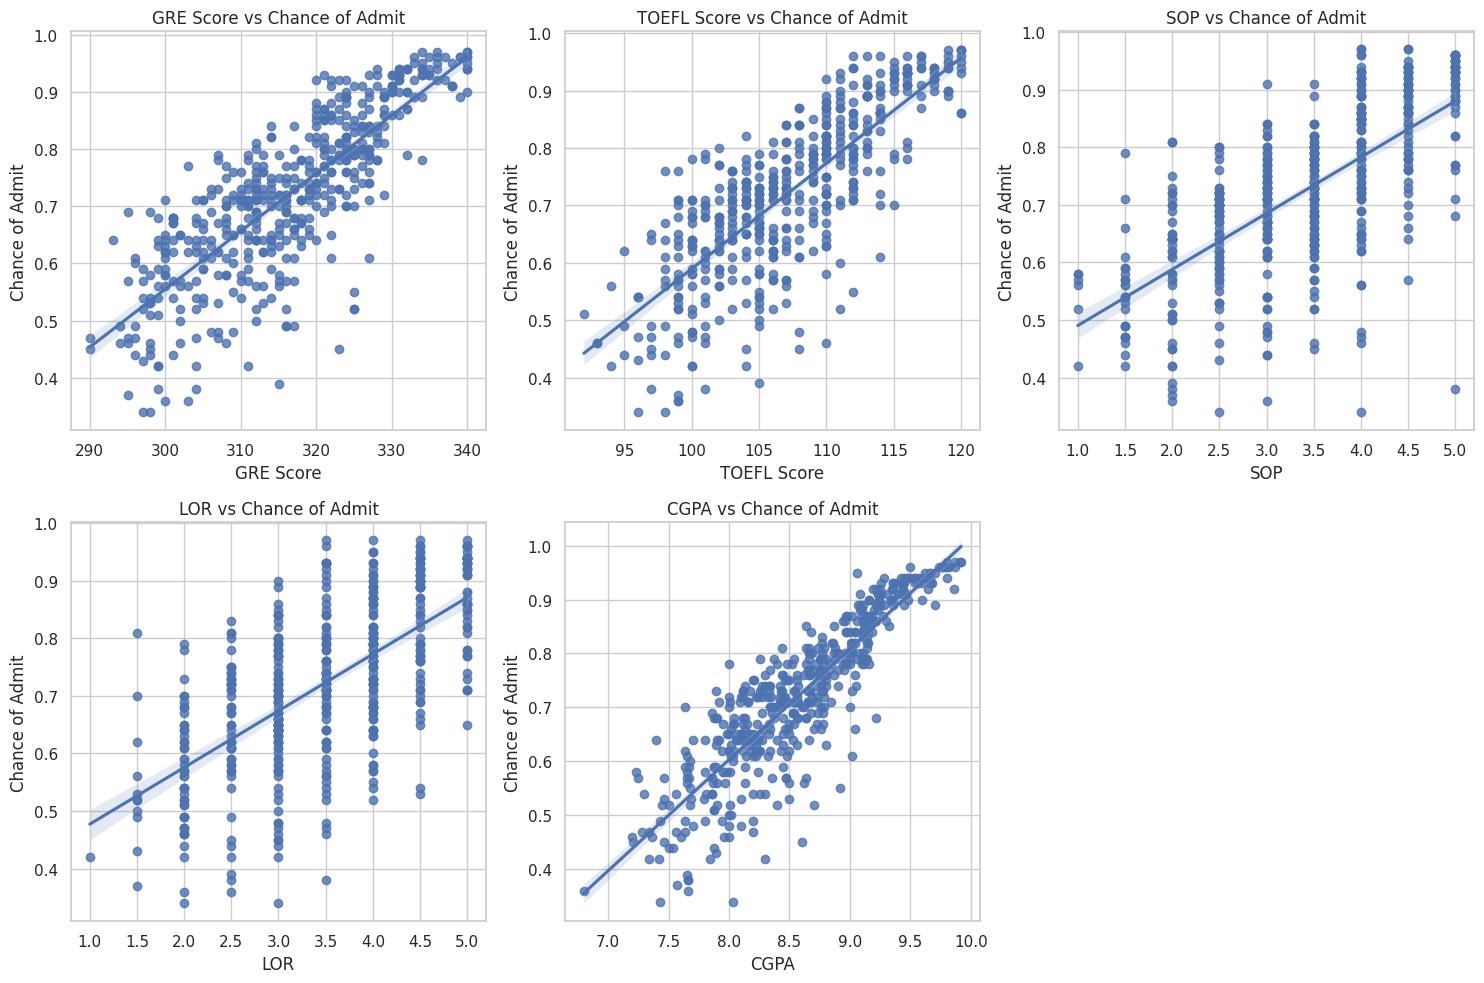

In [ ]:
# Scatter plots with regression line
plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_vars[:-1], 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=df[col], y=df["Chance of Admit"])
    plt.title(f"{col} vs Chance of Admit")

plt.tight_layout()
plt.show()


### Bivariate Analysis (Feature vs Target)

* GRE Score vs Chance of Admit shows a strong positive linear relationship — higher GRE scores clearly correspond to higher admission probability.

* TOEFL Score vs Chance of Admit also exhibits a clear positive trend, indicating English proficiency is an important factor.

* CGPA vs Chance of Admit displays the strongest linear relationship, making CGPA one of the most influential predictors.

* SOP and LOR vs Chance of Admit show positive but more scattered relationships, suggesting they matter, but are less deterministic due to subjective evaluation.

* Applicants with research experience consistently show a higher median and upper range of admission chances compared to those without research.

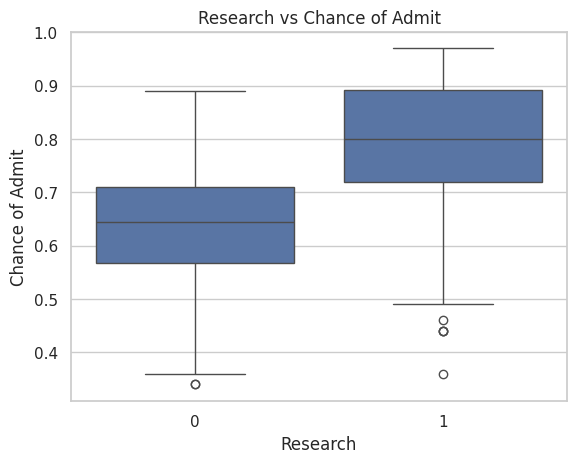

In [ ]:
# Boxplot: Research vs Chance of Admit
sns.boxplot(x="Research", y="Chance of Admit", data=df)
plt.title("Research vs Chance of Admit")
plt.show()


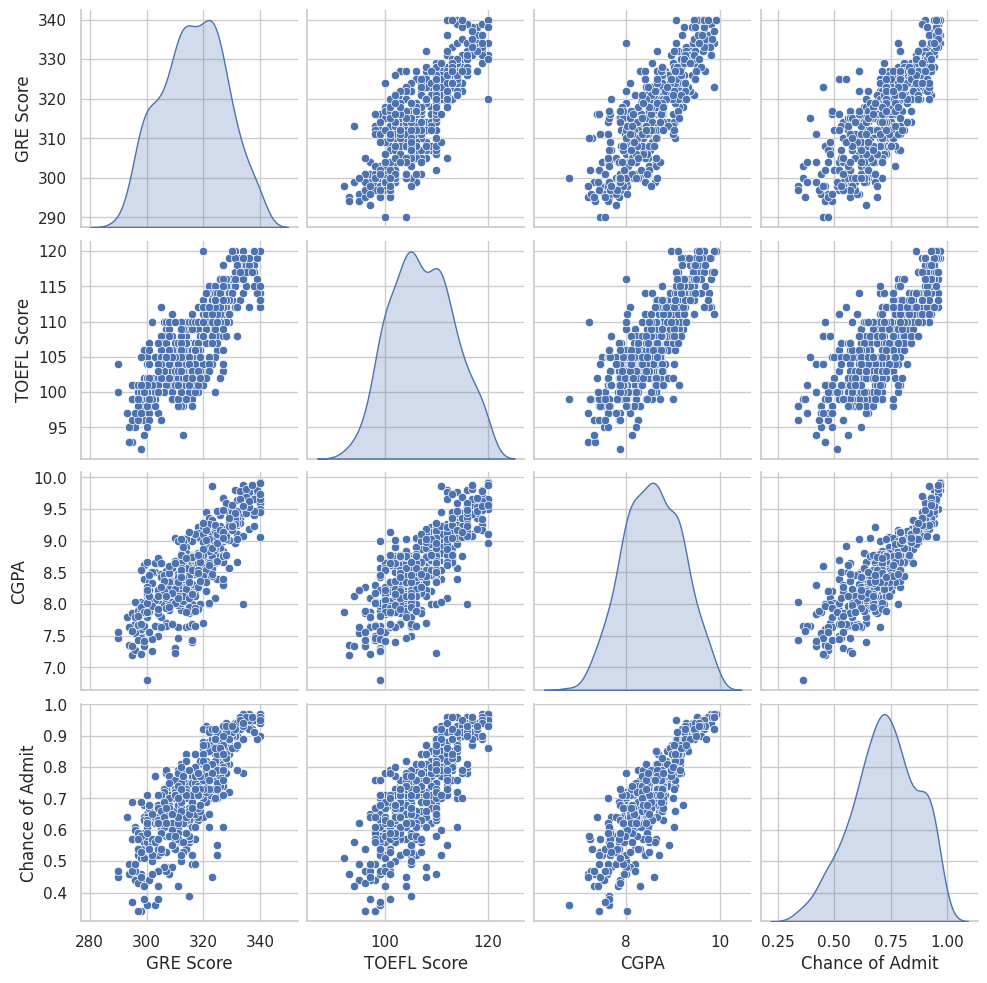

In [ ]:
# Pairplot for overall relationships
sns.pairplot(
    df,
    vars=["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit"],
    diag_kind="kde"
)
plt.show()


### Multivariate Insight (Pairplot)

* Strong positive correlations exist among GRE, TOEFL, CGPA, and Chance of Admit, indicating academic consistency across applicants.

* Relationships appear largely linear, with no strong non-linear patterns or extreme outliers.

* This validates the assumption that linear regression is an appropriate modeling choice for this dataset.

## Data Preprocessing

In [ ]:
# Check number of duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count


np.int64(0)

In [ ]:
# Check for missing values
df.isnull().sum()


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
# Check for Outliers (Using IQR Method)
# List of continuous variables
continuous_vars = ["GRE Score", "TOEFL Score", "SOP", "LOR", "CGPA", "Chance of Admit"]

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check outliers for each variable
for col in continuous_vars:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {outliers.shape[0]} outliers")


GRE Score: 0 outliers
TOEFL Score: 0 outliers
SOP: 0 outliers
LOR: 1 outliers
CGPA: 0 outliers
Chance of Admit: 2 outliers


In [ ]:
# Function to cap outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(
        data[column] < lower_bound, lower_bound,
        np.where(data[column] > upper_bound, upper_bound, data[column])
    )

# Apply capping
for col in continuous_vars:
    cap_outliers(df, col)


In [ ]:
# Final shape after preprocessing
df.shape


(500, 8)

## Correlation Analysis & Multicollinearity Check


In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
corr_matrix


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524377,0.825878,0.563398,0.810421
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.540630,0.810574,0.467012,0.792292
University Rating,0.635376,0.649799,1.000000,0.728024,0.608241,0.705254,0.427047,0.690257
SOP,0.613498,0.644410,0.728024,1.000000,0.662848,0.712154,0.408116,0.684380
LOR,0.524377,0.540630,0.608241,0.662848,1.000000,0.636923,0.372280,0.644832
CGPA,0.825878,0.810574,0.705254,0.712154,0.636923,1.000000,0.501311,0.882551
Research,0.563398,0.467012,0.427047,0.408116,0.372280,0.501311,1.000000,0.545919
Chance of Admit,0.810421,0.792292,0.690257,0.684380,0.644832,0.882551,0.545919,1.000000


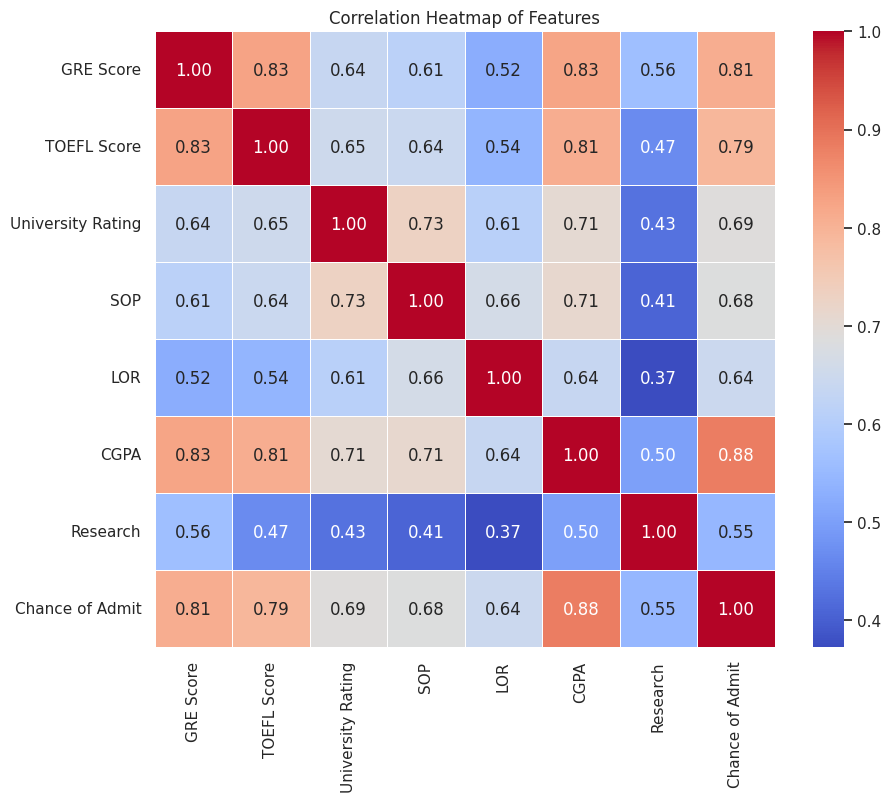

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Features")
plt.show()


The correlation heatmap shows strong positive relationships between academic performance metrics and admission probability, with **CGPA (0.88)** having the highest correlation with Chance of Admit, followed by GRE **(0.81)** and **TOEFL (0.79)**, indicating that academic strength is the primary driver of admissions.

While independent variables such as GRE, TOEFL, and CGPA are moderately correlated with each other (around 0.81–0.83), none exceed the **0.90 threshold**, suggesting that multicollinearity is not severe.

Therefore, no features need to be dropped, and all variables can be retained for building a reliable and interpretable linear regression model.

## Data Preparation for Modeling



In [ ]:
# Separate Features and Target
y = df["Chance of Admit"]
X = df.drop("Chance of Admit", axis=1)


In [ ]:
# Train-Test Split (Before Scaling)
from sklearn.model_selection import train_test_split

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=17
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (400, 7)
Test set shape: (100, 7)


The data was split into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

In [ ]:
# Feature Scaling (StandardScaler) for Linear Regression.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

Feature scaling was performed using StandardScaler after the train-test split to prevent data leakage, ensuring that the model is trained and evaluated properly.

## Linear Regression Model

In [ ]:
import statsmodels.api as sm

# Add constant (intercept)
X_train_sm = sm.add_constant(X_train)

# Build model
model = sm.OLS(y_train, X_train_sm).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     238.5
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          4.97e-137
Time:                        17:30:46   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2978      0.12

In [ ]:
# Display Coefficients with Feature Names

coeff_df = pd.DataFrame({
    "Feature": X_train_sm.columns,
    "Coefficient": model.params,
    "P-value": model.pvalues
})

coeff_df

,Feature,Coefficient,P-value
const,const,-1.297761,3.429396e-24
GRE Score,GRE Score,0.001863,1.421046e-03
TOEFL Score,TOEFL Score,0.002615,1.015910e-02
University Rating,University Rating,0.007144,8.912912e-02
SOP,SOP,-0.002039,6.888690e-01
LOR,LOR,0.012919,7.268641e-03
CGPA,CGPA,0.125393,4.780314e-24
Research,Research,0.024508,1.123190e-03


In [ ]:
# Drop Features with p-value > 0.05
# Identify insignificant features
insignificant_features = coeff_df[coeff_df["P-value"] > 0.05]["Feature"].tolist()

# Remove 'const' if present in list
insignificant_features = [feat for feat in insignificant_features if feat != "const"]

insignificant_features

['University Rating', 'SOP']

In [ ]:
# Retrain Model After Dropping Insignificant Features
# Drop insignificant columns
X_train_refined = X_train.drop(columns=insignificant_features)

# Add constant again
X_train_refined_sm = sm.add_constant(X_train_refined)

# Rebuild model
model_refined = sm.OLS(y_train, X_train_refined_sm).fit()

# New summary
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     332.5
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          6.52e-139
Time:                        17:30:46   Log-Likelihood:                 560.34
No. Observations:                 400   AIC:                            -1109.
Df Residuals:                     394   BIC:                            -1085.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3513      0.114    -11.885      

The initial regression model achieved an **R² of 0.81**, indicating that approximately 81% of the variance in admission probability is explained by the predictor variables. The model is statistically significant overall (Prob(F-statistic) ≈ 0.000), confirming that the predictors collectively influence admission chances.

From the p-values:

* CGPA (p < 0.001) emerged as the strongest predictor.

* GRE, TOEFL, LOR, and Research were statistically significant (p < 0.05).

* University Rating (p = 0.089) and SOP (p = 0.689) were **not statistically significant**.

After removing University Rating and SOP and retraining the model:

* The refined model maintained a strong **R² of 0.808**, showing almost no loss in explanatory power.

* All remaining predictors are statistically significant (p < 0.05).

* CGPA remains the most influential variable, followed by Research, LOR, GRE, and TOEFL.

* The model remains highly significant overall (Prob(F-statistic) ≈ 0.000).

## Test the assumptions of linear regression.

### Multicollinearity Check (VIF)

In [ ]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant for VIF calculation
X_vif = sm.add_constant(X_train_refined)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

vif_data

,Feature,VIF
0,const,1433.081754
1,GRE Score,4.567153
2,TOEFL Score,3.860352
3,LOR,1.683059
4,CGPA,4.676039
5,Research,1.528628


The VIF values for all independent variables (GRE, TOEFL, LOR, CGPA, Research) are below 5, indicating no serious multicollinearity. The high VIF for the constant term can be ignored, as it is not interpreted like predictors.

### Mean of Residuals ≈ 0

In [ ]:
# Get residuals
residuals = model_refined.resid

# Mean of residuals
residuals.mean()

np.float64(2.0983215165415458e-16)

The mean of residuals is approximately zero, satisfying the zero-mean assumption.

### Linear Relationship - Pearson Correlation

In [ ]:
# Pearson Correlation
X_train_refined.corrwith(y_train)

,0
GRE Score,0.810796
TOEFL Score,0.786821
LOR,0.618383
CGPA,0.879581
Research,0.550902


Pearson correlations are reasonably strong and positive.

### Homoscedasticity

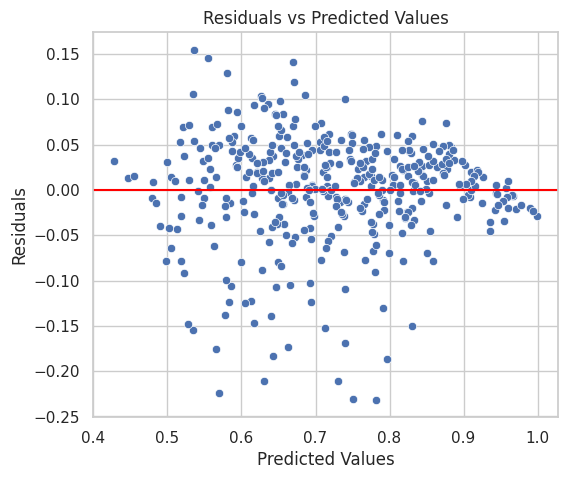

In [ ]:
# Residuals vs Predicted Plot
predicted = model_refined.fittedvalues

plt.figure(figsize=(6, 5))
sns.scatterplot(x=predicted, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

We clearly observe a random scatter around zero and no funnel shape.

In [ ]:
# Goldfeld–Quandt Test
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(residuals, X_train_refined)

print("F-statistic:", gq_test[0])
print("p-value:", gq_test[1])

F-statistic: 1.0885848705753212
p-value: 0.2769974936194391


p-value > 0.05 → Homoscedasticity satisfied

### Normality of Residuals

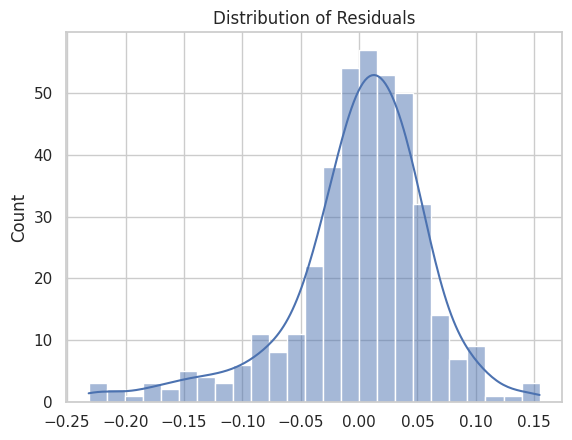

In [ ]:
# Histogram (Bell Shape)
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

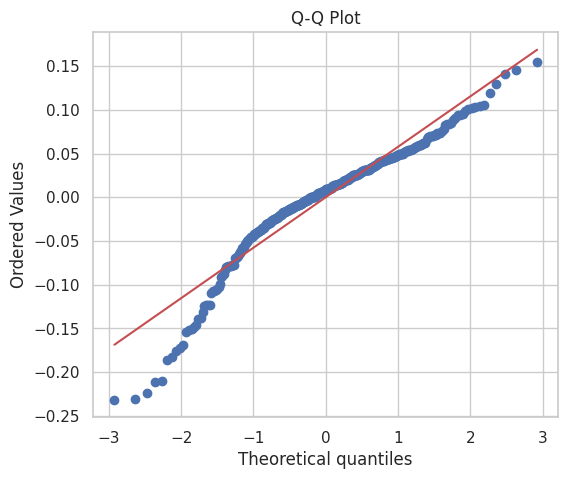

In [ ]:
# Q-Q Plot
import scipy.stats as stats

plt.figure(figsize=(6, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


The residual distribution appears approximately bell-shaped, and although the Q-Q plot shows slight deviation in the extreme tails, most points lie close to the reference line. This indicates that residuals are approximately normally distributed, which is acceptable for linear regression.

---

All major assumptions of linear regression are reasonably satisfied. Therefore, the refined linear regression model is statistically valid, reliable, and appropriate for predicting admission probability.

### Model’s performance.

In [ ]:
# now we evaluate the model on the test dataset
# Prepare Test Data for Statsmodels
# Prepare test data (same columns as refined model)
X_test_refined = X_test[X_train_refined.columns]

# Add constant
X_test_refined_sm = sm.add_constant(X_test_refined)

# Predictions
y_pred = model_refined.predict(X_test_refined_sm)

In [ ]:
# Calculate Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R-squared
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = len(y_test)
p = X_test_refined.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

MAE: 0.04295737368157769
RMSE: 0.060339076793190026
R-squared: 0.8550706095769213
Adjusted R-squared: 0.8473615994480341


The linear regression model exhibits strong predictive performance on the test dataset, with an **R² of 0.855**, indicating that **85.5%** of the variability in admission probability is explained by the model. The Adjusted **R² (0.847)** is closely aligned with R², suggesting that the model is well-specified and not overfitting.

The **MAE of 0.043** and **RMSE of 0.060 **reflect low prediction errors, demonstrating that the model’s estimates deviate only marginally from actual values. Overall, the model is statistically robust and practically reliable for estimating students’ admission probabilities and enabling data-driven guidance.

## Actionable Insights & Recommendations

1. Prioritize Academic Performance (Especially CGPA)

CGPA is the strongest predictor of admission probability. Even small improvements in CGPA significantly increase chances of admission.

Recommendation:
Jamboree should emphasize academic consistency and guide students on realistic CGPA improvement strategies before focusing on other profile components.

2. Standardized Test Scores Matter — But After CGPA

GRE and TOEFL scores have a strong and statistically significant impact on admission probability.

Recommendation:
Students with strong CGPA but moderate test scores should prioritize test preparation, as score improvements can meaningfully boost admission chances.

3. Research Experience Provides Competitive Edge

Students with research experience demonstrate significantly higher admission probabilities.

Recommendation:
Encourage students to participate in research projects, internships, or publish academic work, especially those targeting top-tier universities.

4. Letters of Recommendation Add Value

LOR is statistically significant, indicating qualitative evaluation matters.

Recommendation:
Jamboree should guide students in selecting recommenders strategically and building strong academic/professional relationships early.

5. SOP and University Rating Are Secondary Factors

SOP and University Rating were not statistically significant after controlling for stronger variables.

Insight:
Strong academics outweigh subjective components in predicting admission probability.

Recommendation:
Students should not rely solely on a strong SOP or university reputation to compensate for weak academic metrics.

6. Model Reliability & Deployment

The model explains ~85% of variability with low prediction error, making it suitable for practical use.

Recommendation:
Jamboree can integrate this model into their platform as a probability estimator tool to:

* Help students assess competitiveness

* Suggest improvement areas

* Support personalized counseling

**Final Strategic Conclusion**

Admission probability is primarily driven by measurable academic strength (CGPA, GRE, TOEFL), while research experience and strong recommendations serve as differentiators. Therefore, Jamboree should adopt a structured guidance approach: build strong academics first, then optimize profile components strategically.